<a href="https://colab.research.google.com/github/TaniaAdmane/projet-econometrie/blob/main/ADMANE_TRUSSANT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Présentation de notre projet

Nous avons choisi d'analyser l'impact des catastrophes naturelles sur les crédit accordés par les banques. En effet, alors que les catastrophes naturelles se multiplient, il est important de regarder leur impact économique et financier, aussi bien sur les ménages que les entreprises.

Après une catastrophe, les ménages et les entreprises subissent des pertes économiques et sont donc en plus grande difficulté financière, ce qui se traduit par un risque de défaut plus grand. Nous supposons donc que, dans ce cas de figure, les crédits sont accordés plus difficilement par les banques, au prix de taux plus élevés. En analysant plusieurs données, nous allons tenter de montrer qu'il existe une corrélation entre les deux phénomènes, et essayer de mesurer son ampleur.

# Installation des packages et importation des données

##Installation des packages

In [1]:
install.packages("googledrive")
install.packages('ggplot2')
install.packages('urca')
install.packages("forecast")
install.packages("lmtest")
install.packages("FinTS")
install.packages("reshape2")
install.packages("moments")
install.packages("tseries")
install.packages("Metrics")
install.packages("tsm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib

## Importation des données




Nous importons les observations mensuelles de deux séries : une série des catastrophes naturelles et une série du spread de crédit hypothécaire accordé aux ménages.

La série des catastrophes naturelles représente les pertes économiques subies après une catastrophe naturelle (ajusté de l'inflation).

Un spread de crédit représente l'écart entre le taux "sans risque" (taux le plus bas accordé aux institutions les plus sûres du marché, souvent les Etats) et le taux accordé aux particuliers. Les particuliers ayant plus de chance de faire défaut qu'un Etat, les banques leurs accordent un taux plus élevé pour compenser la prise de risque qu'elles prennent en leur prêtant de l'argent.

Les observations vont de février 2001 à décembre 2021 (251 observations) et portent sur les Etats-Unis. Les données proviennent du [National Centers for Environmental Information](https://www.ncei.noaa.gov/), de la Federal Reserve Bank of St. Louis et de la [FED](https://www.federalreserve.gov/econresdata/notes/feds-notes/2016/recession-risk-and-the-excess-bond-premium-20160408.html).

 Notre base de données se trouve sur Github et a été installée à la main. Nous plaçons ensuite les données dans un data frame nommé "base".


In [2]:
library(googledrive)
Base <- read.csv2("CORE_DATA.csv")

Nous convertissons la colonne "Date" de la base de données au format Year/Month/Day.

In [3]:
Base$Date<-as.Date(Base$Date,format = "%d/%m/%Y")
tail(Base$Date)

[1] "2021-07-01" "2021-08-01" "2021-09-01" "2021-10-01" "2021-11-01"
[6] "2021-12-01"

La série de données des pertes dûes aux catastrophes naturelles contient beaucoup de valeurs égales à 0, correspondant aux mois où il n'y a pas eu de catastrophes (donc aucune perte économique), sur lesquelles nous ne pouvons pas appliquer de logarithme. Nous ajoutons donc +1 à toutes les valeurs de la série afin de régler ce problème.

In [4]:
Base$NAT_DISASTERS <- Base$NAT_DISASTERS + 1

On affiche la database. La série GZ_spread correspond au spread de crédit accordé aux entreprises, la série Mortgage_spread au spread de crédit hypothécaire accordé aux ménages.

In [ ]:
View(Base)

Date,NAT_DISASTERS,MORTGAGE_SPREADS
<date>,<dbl>,<dbl>
2001-02-01,1.00,1.9500
2001-03-01,1.00,2.0620
2001-04-01,4921.60,1.9375
2001-05-01,1.00,1.7550
2001-06-01,13551.00,1.8800
2001-07-01,1.00,1.8875
2001-08-01,1.00,1.9800
2001-09-01,1.00,2.0875
2001-10-01,1.00,2.0475


Pour alléger les commandes, nous définissons les variables suivantes.
Pour alléger nos commentaires, nous citerons la série des pertes économiques dûes aux catastrophes naturelles comme la "série des catastrophes naturelles".

In [5]:
NAT_DISASTERS <- Base$NAT_DISASTERS
MORTGAGE_SPREADS <- Base$MORTGAGE_SPREADS
DATE <- Base$Date

# I. MODÉLISATION UNIVARIÉE


---








## 1. Représentations graphiques, autocorrélogrammes simples et partiels





### Catastrophes naturelles


Nous représentons graphiquement la série des catastrophes naturelles, préalablement passée en log.


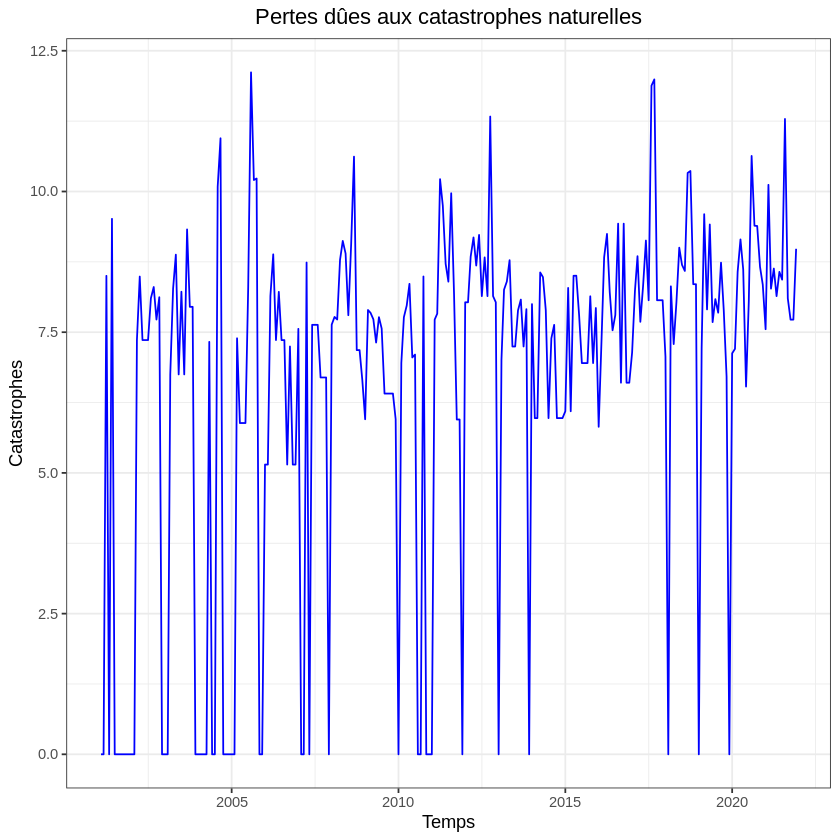

In [ ]:
library(ggplot2)
Base$logI <- log(NAT_DISASTERS) #passage en log
p1<-ggplot(data=Base,aes(x=DATE,y=logI))+geom_line(colour='blue')+ggtitle('Pertes dûes aux catastrophes naturelles')+xlab('Temps')+ylab('Catastrophes')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
p1


D'après le graphique, il est difficile de dire si la série est stationnaire. On observe que la série est tirée vers le bas avec des pics allant jusque 1, ce qui est assez anormal dans une représentation graphique mais s'explique car nous avons beaucoup de données = 1 correspondant aux mois où il n'y a pas eu de pertes dûes aux catastrophes naturelles dans le pays.

Autocorrélogramme (ACF)

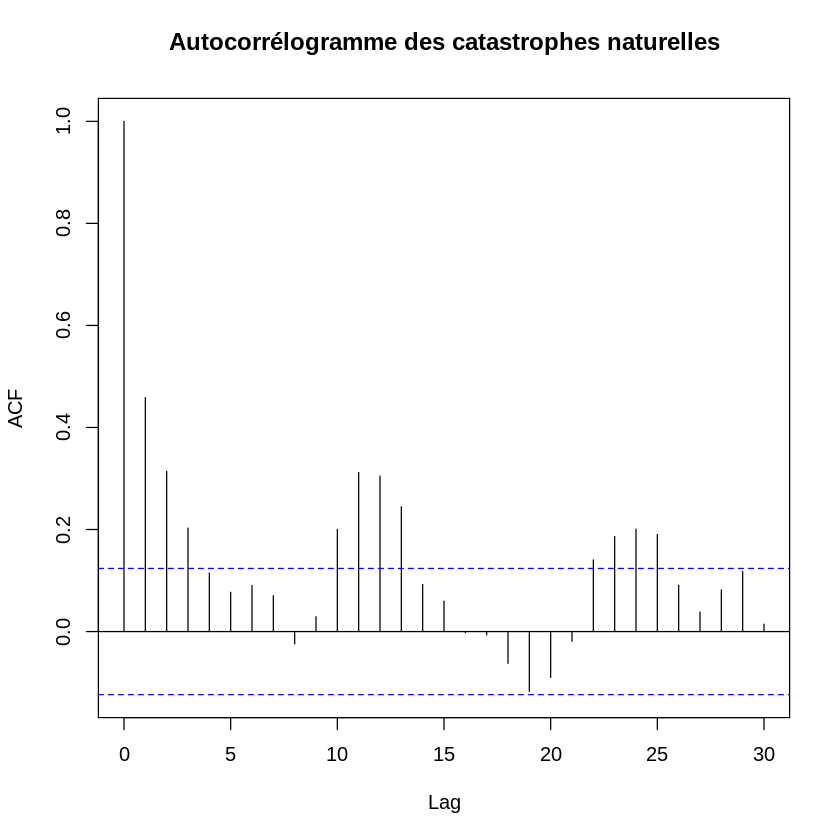

In [ ]:
acf(Base$logI, lag.max=30, main='Autocorrélogramme des catastrophes naturelles')

Les autocorrélations sont significatives jusqu'au retard 3, puis ne le sont plus mais redeviennent significatives périodiquement, à intervalles de temps régulier. Ceci nous indique qu'il y a de la saisonnalité dans les données. Nous la traiterons dans une partie suivante.

Autocorrélogramme partiel (PACF)

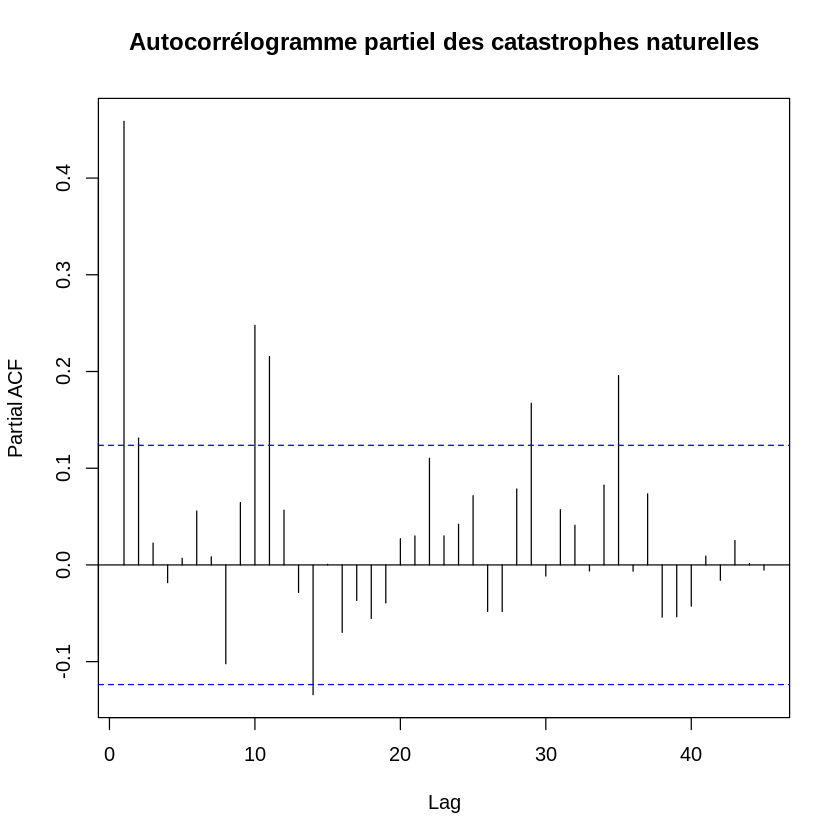

In [ ]:
pacf(Base$logI, lag.max=45, main='Autocorrélogramme partiel des catastrophes naturelles')

Les autocorrélations partielles décroissent vers 0 mais restent significatives pour beaucoup de retard. Nous pouvons encore une fois observer la saisonnalité de la série.

Il est difficile d'interpréter les ACF et PACF et d'estimer la forme de notre modèle. Il faut d'abord régler le problème de saisonnalité.

### Spread de crédit hypothécaire

Nous avons choisi de travailler sur la série du spread des crédits hypothécaires accordés aux ménages. Pour alléger nos commentaires, nous pourrons appeler cette série simplement "Spread de crédit", puisque nous n'étudierons pas d'autres spread dans le projet. Nous représentons graphiquement la série ci dessous.


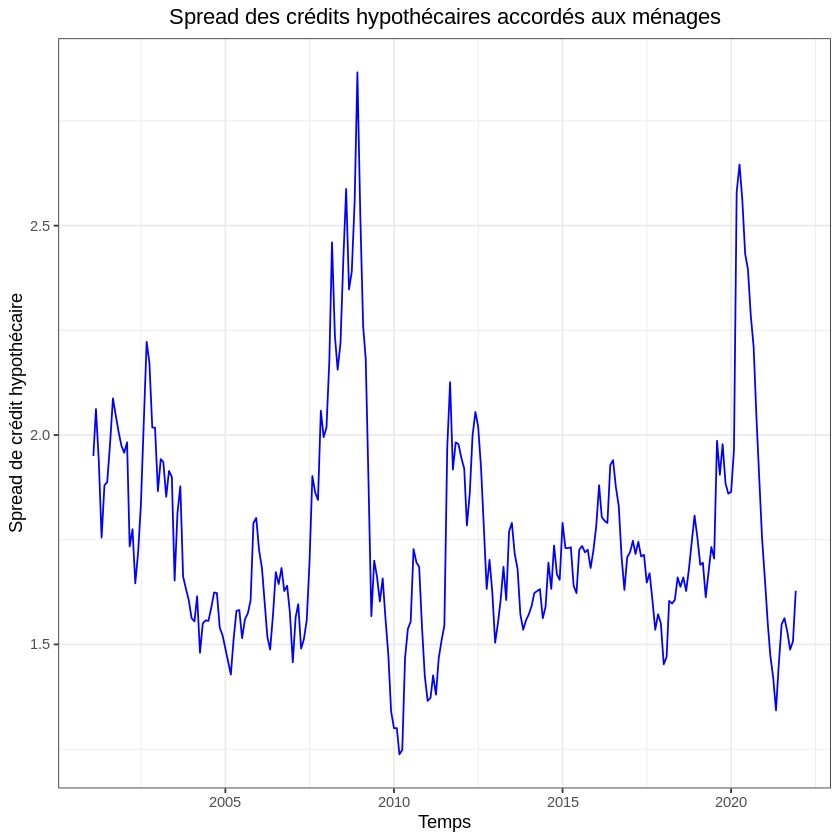

In [ ]:
library(ggplot2)
p1<-ggplot(data=Base,aes(x=DATE,y=MORTGAGE_SPREADS))+geom_line(colour='blue')+ggtitle('Spread des crédits hypothécaires accordés aux ménages')+xlab('Temps')+ylab('Spread de crédit hypothécaire')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
p1

Le spread de crédit hypothécaire fluctue entre 1,5 et 2 en moyenne. Au vu du graphique, il est difficile de conclure sur la stationnarité de la série : une stationnarité en moyenne semble être possible mais pas une stationnarité en variance.

Nous observons de fortes fluctuations dans les périodes de crise : la crise de 2008 et la crise Covid en 2020. En période de crise, les ménages peuvent avoir plus de mal à rembourser leur crédit. Les banques peuvent alors demander une prime de risque plus grande afin de compenser le risque de défaut accru, ce qui explique les hausses du spread de crédit.

Autocorrélogramme (ACF)

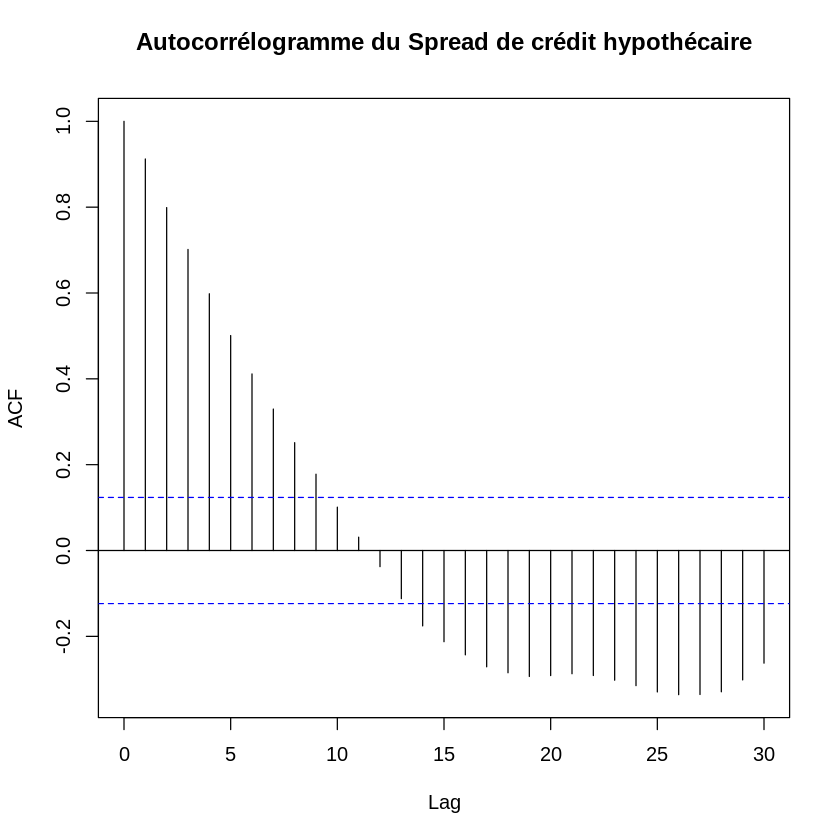

In [ ]:
acf(MORTGAGE_SPREADS, lag.max=30, main='Autocorrélogramme du Spread de crédit hypothécaire')

Les autocorrélations sont positives et significatives jusqu'au retard 9.
Elles sont proches de 1 pour les retards 0, 1 et 2 puis décroissent vers 0. On peut donc dire que le spread de crédit hypothécaire est assez autocorrélé.

Autocorrélogramme partiel (PACF)

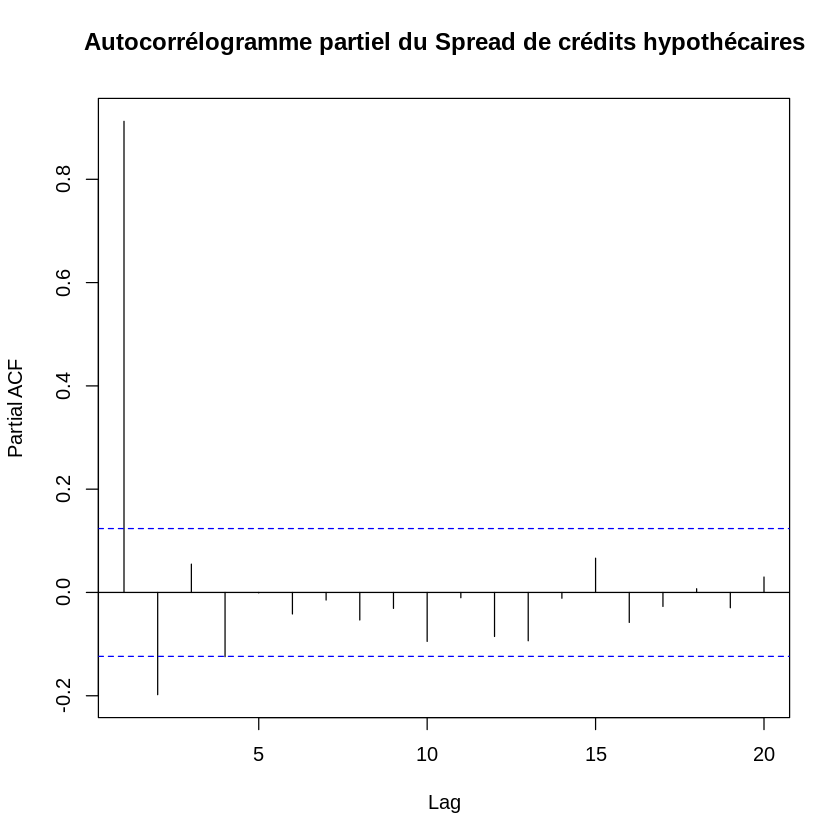

In [ ]:
pacf(MORTGAGE_SPREADS, lag.max=20, main='Autocorrélogramme partiel du Spread de crédits hypothécaires')

L'autocorrélation partielle à l'ordre 1 est très proche de 1. Les autocorrélations partielles sont siginificatives pour les retards 1 et 2.

Une autocorrélation décroissante vers 0 et une autocorrélation partielle s'annulant brutalement sont caractéristiques d'un processus AR. Nous retenons ici que notre série est un processus AR (2) car l'annulation brutale des autocorrélations partielles se fait au bout du 2e retard.

## 2. Test de racine unitaire et méthodes de stationnarisation appropriées


### Catastrophes naturelles

####Test de Dickey-Fuller augmenté


Le test de Dickey-Fuller augmenté (ADF) permet de tester la stationnarité d'un modèle. Il existe trois types de test ADF, selon les caractéristiques de la série. L'hypothèse nulle d'un test ADF est l'hypothèse de racine unitaire, c'est à dire de non stationnarité.

##### Test ADF avec constante et tendance déterministe

Nous appliquons d'abord le test le plus large, c'est à dire le test ADF avec constante et tendance déterministe. Le nombre de retards maximum est fixé à 10 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

In [ ]:
library(urca)
adf1<-ur.df(y = NAT_DISASTERS,type=c("trend"), lag=10, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-41023  -4857  -3422  -1377 177988 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2700.18423 2706.91378   0.998    0.320    
z.lag.1       -0.77421    0.07841  -9.874   <2e-16 ***
tt            20.02228   18.36182   1.090    0.277    
z.diff.lag     0.06303    0.06498   0.970    0.333    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19580 on 236 degrees of freedom
Multiple R-squared:  0.3667,	Adjusted R-squared:  0.3587 
F-statistic: 45.55 on 3 and 236 DF,  p-value: < 2.2e-16


Value of test-statistic is: -9.8738 32.4986 48.7474 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.98 -3.42 -3.13
phi2  6.15  4.

La statistique du test ADF (**t ADF**) est égale à -9,87.

Pour un risque de première espèce de 5%, le seuil de rejet est -3,42.

**t ADF** = -9,87 < -3,42

La statistique de test ADF est aussi inférieure aux seuils critiques pour des risques de première espèce de 1% et 10%. On rejette donc l'hypothèse nulle de racine unitaire. Notre série est stationnaire.

Nous calculons le seuil de rejet pour un risque de première espèce de 5% dans la loi Normale. Nous n'utilisons pas la table de Dickey Fuller car nous avons rejeté l'hypothèse nulle de racine unitaire. Nous utilisons la loi Normale plutot que la loi de Student car nous avons beaucoup d'observations.

In [ ]:
seuil_rejet <- qt(1 - 0.05/2, 250)
print(seuil_rejet)

[1] 1.969498


Nous cherchons à vérifier la significativité de la tendance déterministe dans le modèle. Nous testons l'hypothèse nulle de non significativité de la tendance contre l'hypothèse alternative.

La t-value de la tendance déterministe est égale à 1,09. Le seuil de rejet pour un risque de première espèce de 5% est de 1,96.

1,09 < 1,96 on ne peut donc pas rejeter l'hypothèse nulle. La tendance déterministe n'est pas significativement différente de 0, pour un risque de première espèce de 5%.

##### Test ADF avec constante

Nous avons rejeter l'hypothèse de significativité de la tendance, nous allons donc effectuer un nouveau test ADF avec seulement une constante, et tester la significativité de cette dernière.

In [ ]:
adf2<-ur.df(y = NAT_DISASTERS,type=c("drift"), lag=10, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-41075  -5091  -3676  -1546 176503 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5245.58717 1371.08461   3.826 0.000167 ***
z.lag.1       -0.76431    0.07791  -9.810  < 2e-16 ***
z.diff.lag     0.05789    0.06483   0.893 0.372832    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19580 on 237 degrees of freedom
Multiple R-squared:  0.3635,	Adjusted R-squared:  0.3581 
F-statistic: 67.68 on 2 and 237 DF,  p-value: < 2.2e-16


Value of test-statistic is: -9.8096 48.115 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47  4.61  3.79


La statistique du test ADF (**t ADF**) est égale à -9,8.

Pour un risque de première espèce de 5%, le seuil de rejet est -2,87.

**t ADF** = -9,8 < -2,87

La statistique de test ADF est aussi inférieure aux seuils critiques pour des risques de première espèce de 1% et 10%. Nous rejettons donc l'hypothèse nulle de racine unitaire.

La t-stat de la tendance constante est égale à 3,826. Le seuil de rejet pour un risque de première espèce de 5% est de 1,96 (cf table de la loi Normale). 3,826 > 1,96 nous pouvons donc rejeter l'hypothèse nulle. La constante est significative.

Nous pouvons arrêter les test ADF ici et conclure que notre série est de type : I(0) + constante. La série est donc stationnaire, avec constante significative et sans trend.

#### Test de stationnarité de KPSS

Nous appliquons maintenant le test de stationnarité de KPSS. Dans un test KPSS, l'hypothèse nulle est l'hypothèse de stationnarité de la série. Nous avons conclu grâce au test de Dickey Fuller que la constante est siginificative, nous effectuons donc le test de KPSS dans ce sens.

In [ ]:
kpss_mu <- ur.kpss(y = NAT_DISASTERS, type = "mu", lags = "short")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.2138 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La statistique du test KPSS (**t KPSS**) est égale à 0,2138. Le seuil de rejet à 5% est égal à 0,463.

**t KPSS** = 0,2138 < 0,463. La stat de test est aussi inférieure au seuil de rejet à 1%. On ne peut pas rejeter l'hypothèse nulle de stationnarité de la série autour d'une constante.

#### Conclusion


D'après nos tests ADF et KPSS, nous pouvons conclure que la série des catastrophes naturelles est stationnaire avec constante.

### Spread de crédit hypothécaire

####Test de Dickey-Fuller augmenté

##### Test ADF avec constante et tendance déterministe

On applique le test ADF avec constante et tendance déterministe. Le nombre de retards maximum est fixé à 10. Le nombre de retards optimal est déterminé par la minimisation du critère AIC.

In [ ]:
library(urca)
adf1<-ur.df(y = MORTGAGE_SPREADS,type=c("trend"), lag=10, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27514 -0.06720 -0.00930  0.04299  0.62089 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.942e-01  5.104e-02   3.805 0.000181 ***
z.lag.1     -1.122e-01  2.783e-02  -4.030 7.54e-05 ***
tt           9.164e-06  1.009e-04   0.091 0.927737    
z.diff.lag1  2.161e-01  6.449e-02   3.350 0.000941 ***
z.diff.lag2 -5.511e-02  6.512e-02  -0.846 0.398275    
z.diff.lag3  1.334e-01  6.482e-02   2.058 0.040673 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1083 on 234 degrees of freedom
Multiple R-squared:  0.09786,	Adjusted R-squared:  0.07859 
F-statistic: 5.077 on 5 and 234 DF,  p-value: 0.0001942


Value of test-stati

In [ ]:
seuil_rejet <- qt(1 - 0.05/2, 250)
print(seuil_rejet)

[1] 1.969498


La statistique du test ADF (**t ADF**) est égale à -4,03.

Pour un risque de première espèce de 5%, le seuil de rejet est -3,42.

**t ADF** = -4,03 < -3,42

La statistique de test ADF est aussi inférieure aux seuils critiques pour des risques de première espèce de 1% et 10%. Nous rejettons donc l'hypothèse nulle de racine unitaire. La série est stationnaire.

La t-stat de la tendance déterministe est égale à 0,091. Le seuil de rejet pour un risque de première espèce de 5% est de 1,96 (cf table de la loi Normale). 0,091 < 1,96 on ne rejette donc pas l'hypothèse nulle de tendance déterministe non significative.

##### Test ADF avec constante

In [ ]:
adf2<-ur.df(y = MORTGAGE_SPREADS,type=c("drift"), lag=10, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27547 -0.06721 -0.00981  0.04330  0.62179 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.19537    0.04916   3.974 9.41e-05 ***
z.lag.1     -0.11218    0.02777  -4.039 7.27e-05 ***
z.diff.lag1  0.21607    0.06436   3.357 0.000918 ***
z.diff.lag2 -0.05510    0.06499  -0.848 0.397344    
z.diff.lag3  0.13345    0.06468   2.063 0.040179 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1081 on 235 degrees of freedom
Multiple R-squared:  0.09783,	Adjusted R-squared:  0.08247 
F-statistic: 6.371 on 4 and 235 DF,  p-value: 6.968e-05


Value of test-statistic is: -4.0391 8.1715 

Critical values for test statistics: 
      1p

La statistique du test ADF (**t ADF**) est égale à -4,039.

Pour un risque de première espèce de 5%, le seuil de rejet est -2,87.

**t ADF** = -4,039 < -2,87

La statistique de test ADF est aussi inférieure aux seuils critiques pour des risques de première espèce de 1% et 10%. Nous rejettons donc l'hypothèse nulle de racine unitaire. La série est stationnaire.

La t-stat de la constante est égale à 3,974. Le seuil de rejet pour un risque de première espèce de 5% est de 1,96 (cf table de la loi Normale). 3,974 > 1,96 nous rejettons donc l'hypothèse nulle de constante non significative.

Nous pouvons arrêter les test ADF ici et conclure que notre série est stationnaire, avec constante significative mais sans tendance, c'est à dire I(0) + constante.

#### Test de stationnarité de KPSS

Nous appliquons maintenant le test de stationnarité de KPSS. Dans un test KPSS, l'hypothèse nulle est l'hypothèse de stationnarité de la série. Nous avons conclu grâce au test de Dickey Fuller augmenté que la constante est siginificative, nous effectuons donc le test de KPSS dans ce sens.

In [ ]:
kpss_mu <- ur.kpss(y = MORTGAGE_SPREADS, type = "mu", lags = "short")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.0854 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La statistique du test KPSS (**t KPSS**) est égale à 0,0854. Le seuil de rejet à 5% est égal à 0,463.

**t KPSS** = 0,0854 < 0,463. Au seuil de 5% nous ne pouvons pas rejeter l'hypothèse nulle de stationnarité. Les résultats du test KPSS indiquent que la série est stationnaire autour d'une constante.

#### Conclusion

Les test ADF et KPSS indiquent tous deux que la série est stationnaire et avec constante significative. Nous n'avons pas besoin d'appliquer certaines méthodes comme la différenciation pour stationnariser la série.

## 3. Sélection d'un modèle satisfaisant les conditions de validité

#### Stationnarisation

Nous choisissons de continuer notre étude avec la série du spread de crédit hypothécaire. Nous avons conclu précédemment que notre série est stationnaire. Au vu de l'autocorrélogramme et l'autocorrélogramme partiel de notre série, nous pouvons voir que nous faisons face à un AR(2).

#### Critère AIC et sélection du meilleur modèle

Nous utilisons le critère AIC afin de trouver le meilleur modèle. Le meilleur modèle est celui qui minimise le critère AIC. Nous choisissons de tester les modèles ARMA possibles jusqu'à p = 10 et q = 10 car c'est le dernier retard significatif dans l'autocorrélogramme.

p : nombre de retards de la partie AR,
d : nombre de différenciations pour obtenir un série stationnaire,
q : nombre de retards pour la partie MA

In [ ]:
library(forecast)

mat_aic <- matrix(0, nrow = 10, ncol = 10)

for (i in 0:9) {
  for (j in 0:9) {
    ARMA_ij <- Arima(y = MORTGAGE_SPREADS, order = c(i, 0, j), method = "ML")
    mat_aic[i + 1, j + 1] <- ARMA_ij$aic
  }
}

rownames(mat_aic) <- c('p=1', 'p=2', 'p=3', 'p=4', 'p=5', 'p=6', 'p=7','p=8', 'p=9', 'p=10')
colnames(mat_aic) <- c('q=1', 'q=2', 'q=3', 'q=4', 'q=5', 'q=6', 'q=7','q=8', 'q=9', 'q=10')
print(mat_aic)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



            q=1       q=2       q=3       q=4       q=5       q=6       q=7
p=1    58.15351 -184.9672 -253.0621 -330.3343 -353.3858 -371.6407 -377.0123
p=2  -389.83952 -398.2083 -396.9836 -397.9273 -396.0631 -394.3525 -392.3745
p=3  -396.94855 -398.2389 -397.0026 -396.1948 -393.9225 -392.8975 -390.8382
p=4  -395.53222 -397.1335 -407.1914 -401.6215 -402.9064 -390.8985 -388.8521
p=5  -397.94098 -395.8615 -405.1931 -403.2336 -401.4411 -399.4178 -391.9033
p=6  -395.95263 -394.9671 -403.3403 -401.2954 -397.7864 -387.4812 -395.8911
p=7  -394.37707 -393.1290 -391.1323 -399.3571 -390.1485 -398.3868 -396.6239
p=8  -392.37869 -391.1534 -389.1531 -392.8173 -399.8437 -396.5630 -394.5141
p=9  -390.93864 -389.4508 -387.4329 -391.1300 -383.1854 -386.7226 -392.1412
p=10 -389.27423 -387.5130 -385.4530 -389.3189 -387.2684 -386.7827 -393.2673
           q=8       q=9      q=10
p=1  -383.6254 -383.3789 -385.1842
p=2  -390.6702 -388.6919 -387.5663
p=3  -388.8608 -386.9794 -384.9621
p=4  -386.3097 -385.0537

Nous voyons que le modèle qui minimise le critère AIC est le modèle ARMA (4,3). Cependant, au vu de l'autocorrélogramme il est clair que nous ne faisons pas face à un ARMA mais seulement face à un AR(2).

## 4. Estimation d'un AR

Nous spécifions donc un modèle AR(2). Nous utilisons la librairie forecast pour estimer le modèle.

In [ ]:
library(forecast)
# Estimation d'un  modèle
AR2<-Arima(y = MORTGAGE_SPREADS,order=c(2,0,0))
# Affichage de l'estimation
summary(AR2)


#affichage des coefficients
library(lmtest)
coeftest(AR2)

Series: MORTGAGE_SPREADS 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2    mean
      1.0844  -0.1894  1.7585
s.e.  0.0619   0.0622  0.0630

sigma^2 = 0.01172:  log likelihood = 202.47
AIC=-396.95   AICc=-396.79   BIC=-382.85

Training set error measures:
                        ME      RMSE        MAE        MPE     MAPE      MASE
Training set -0.0007885747 0.1076038 0.07707249 -0.3801991 4.281695 0.9523588
                   ACF1
Training set 0.01265628

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ar1        1.084393   0.061927 17.5108 < 2.2e-16 ***
ar2       -0.189366   0.062166 -3.0461  0.002318 ** 
intercept  1.758504   0.063037 27.8965 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Nous vérifions la significativité des coefficients, en posant H0 l'hypothèse nulle de non significiativité des coefficients contre H1 l'hypothèse alternative de significativité.

Le seuil critique est 1.96 pour un risque de première espèce égal à 5%.

Nous pouvons voir que les z value des retards 1 et 2 sont toutes supérieures en valeurs absolue au seuil de rejet 1,96. Nous pouvons donc rejeter l'hypothèse nulle et admettre que les coefficients de ces retards sont significiativement différents de 0, pour un risque de première espèce de 5%.

#### Estimation d'un modèle alternatif

On estime un AR(3) pour vérifier qu'il n'est pas nécessaire d'ajouter des retards supplémentaires.

In [ ]:
library(forecast)
AR3<-Arima(y =MORTGAGE_SPREADS ,order=c(3,0,0))
summary(AR3)

library(lmtest)
coeftest(AR3)

Series: MORTGAGE_SPREADS 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     ar3    mean
      1.0937  -0.2421  0.0484  1.7586
s.e.  0.0631   0.0928  0.0633  0.0659

sigma^2 = 0.01174:  log likelihood = 202.77
AIC=-395.53   AICc=-395.29   BIC=-377.91

Training set error measures:
                        ME      RMSE        MAE        MPE     MAPE      MASE
Training set -0.0008575844 0.1074774 0.07713782 -0.3836131 4.287783 0.9531661
                    ACF1
Training set 0.009741177


z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ar1        1.093697   0.063050 17.3465 < 2.2e-16 ***
ar2       -0.242112   0.092814 -2.6086  0.009092 ** 
ar3        0.048376   0.063265  0.7647  0.444479    
intercept  1.758553   0.065864 26.6996 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


La z value pour un retard 3 est égale à 0,7647. Le seuil critique pour un risque de première espèce de 5% est de 1,96.
La z value est donc inférieure au seuil critique, donc nous ne pouvons pas rejeter l'hypothèse nulle de non significativité du coefficient. Il n'est donc pas nécessaire d'ajouter un 3e retard au modèle.

####Analyse des racines

On représente les inverses des racines dans le cercle unitaire. La condition de stationnarité impose que ces inverses doivent être de module strictement inférieur à 1, c'est-à-dire dans le cercle unitaire.

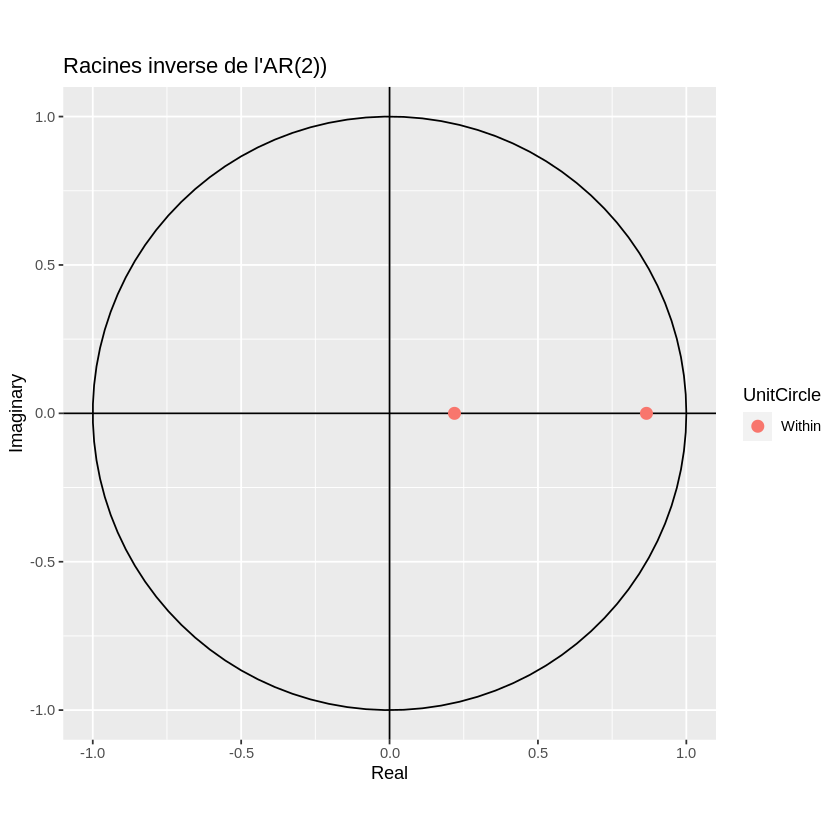

In [ ]:
autoplot(AR2,main="Racines inverse de l'AR(2))")

Les points sont bien à l'intérieur du cercle, donc la condition de stationnarité est satisfaite.

### Tests sur les résidus

#### Test de Ljung Box



On teste l'autocorrélation des résidus jusqu'à l'ordre 10 avec le test de Ljung Box. Nous testons l'hypothèse nulle que les résidus sont non autocorrélés contre l'hypothèse alternative que les résidus sont autocorrélés.


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 5.5516, df = 8, p-value = 0.6973

Model df: 2.   Total lags used: 10



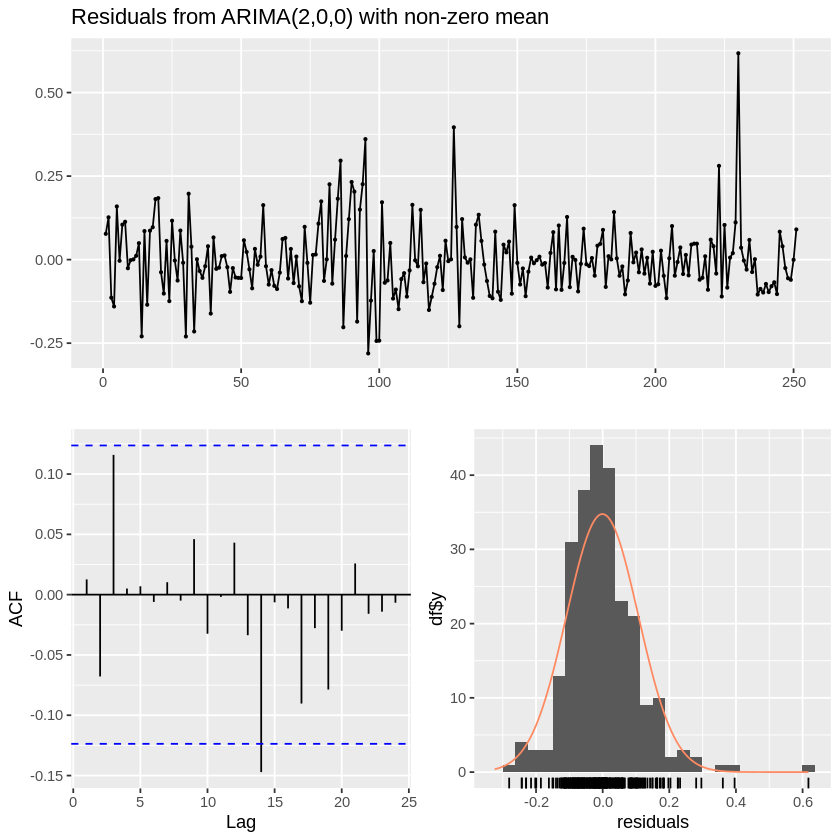

In [ ]:
test_res<-checkresiduals(AR2,lag = 10)

L'autocorrélogramme montre que l'autocorrélation à l'ordre 14 est significativement différente de 0.

La statistique de Lung Box est égale à Q = 5,55.
Sous HO, la statistique de test de Lung Box suit une loi de Chi-deux (10 - 2) = 15,5073

5,55 < 15,5073 donc nous ne rejetons pas l'hypothèse nulle d'absence d'autocorrélation des résidus au seuil de 5%.

####Test de l'hypothèse de normalité des résidus

On représente l'histogramme des résidus (en gris) et l'histogramme d'une loi normale avec la même moyenne et le même écart type que nos résidus (en rouge).

In [ ]:
#afficher les valeurs min et max de nos résidus
which(AR2$residuals==max(AR2$residuals))
which(AR2$residuals==min(AR2$residuals))


[1] 230

[1] 96

[1] "Skewness des residus : 0.580944"

[1] "kurtosis des residus : 4.488947"

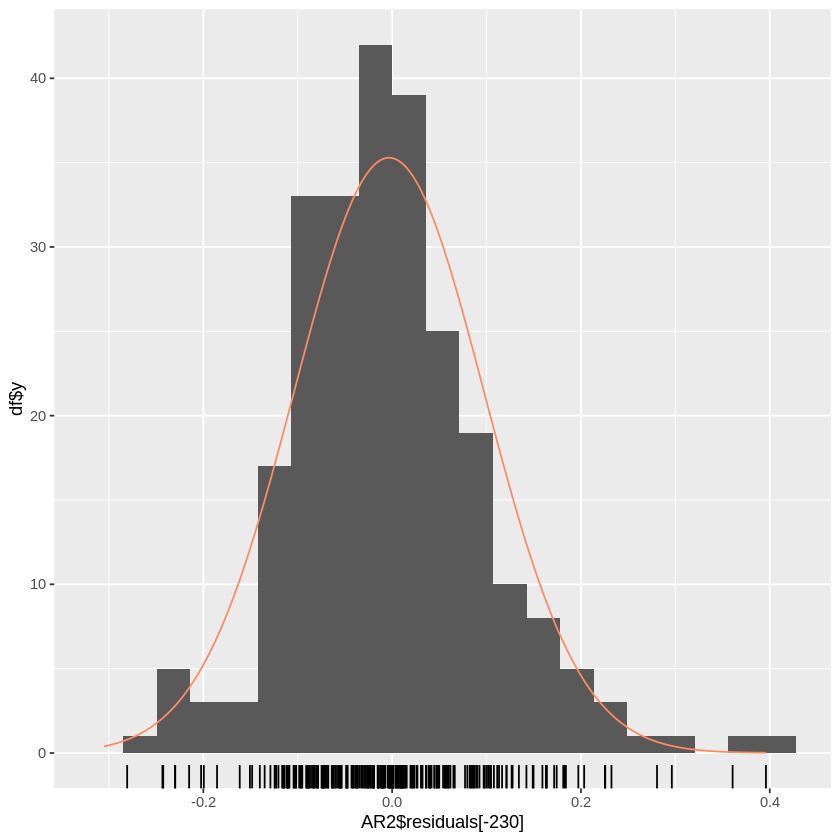

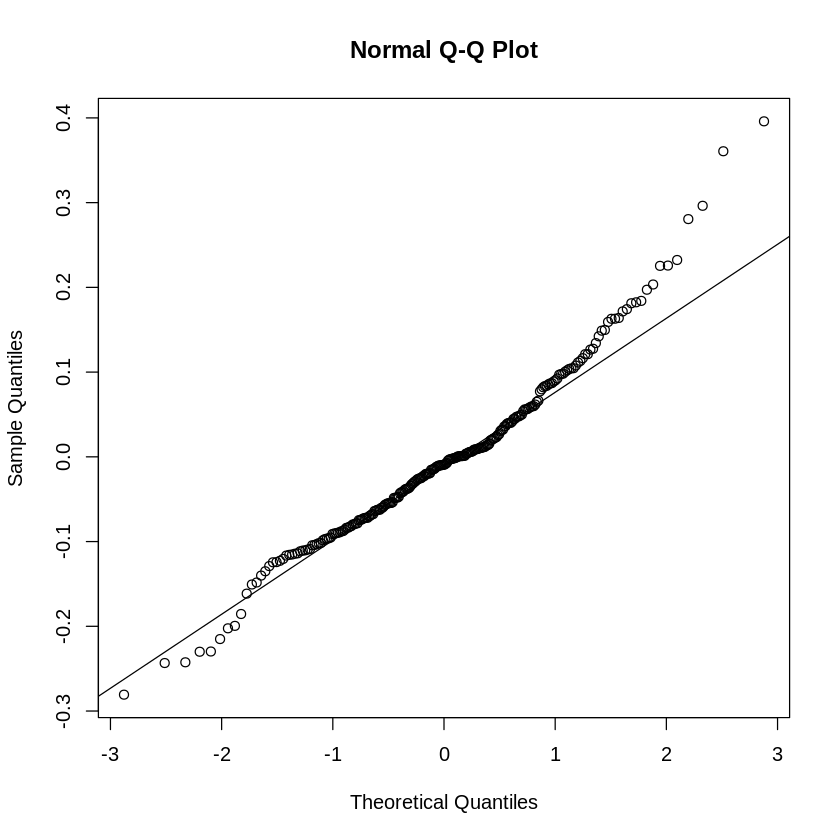

In [ ]:
gghistogram(AR2$residuals[-230], add.normal = TRUE)
library(moments)
sprintf("Skewness des residus : %f",skewness(AR2$residuals[-230]))
sprintf("kurtosis des residus : %f",kurtosis(AR2$residuals[-230]))
qqnorm(AR2$residuals[-230])
qqline(AR2$residuals[-230])

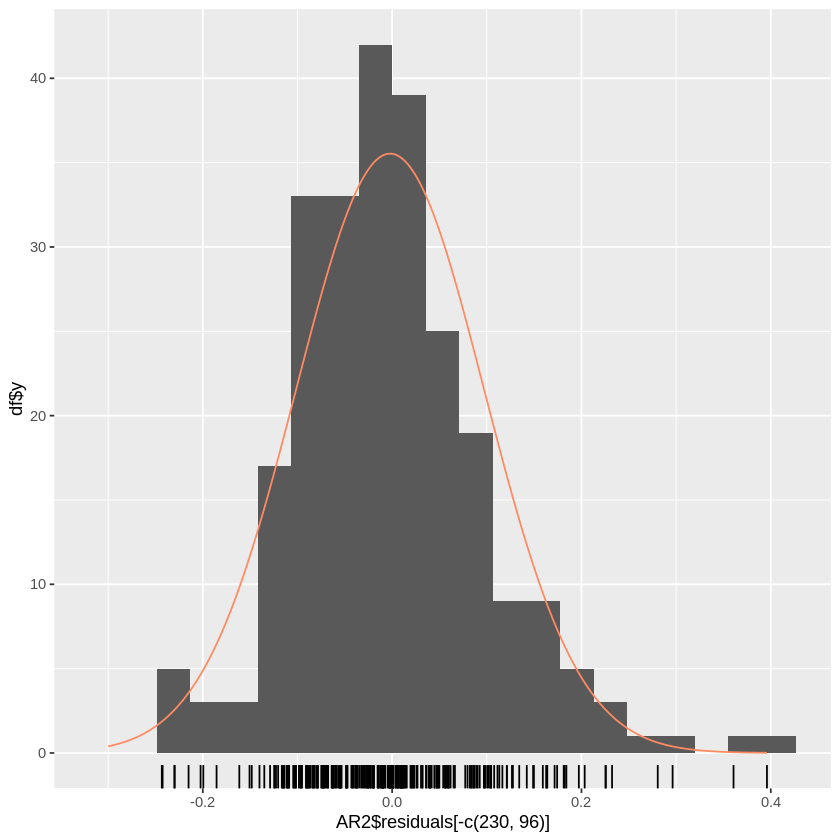

In [ ]:
gghistogram(AR2$residuals[-c(230,96)], add.normal = TRUE)

Nous voyons que les deux histogrammes sont différents, donc nous pouvons supposer que nos résidus ne suivent pas une loi normale.

####Test de Jarque and Bera


In [ ]:
library(moments)
sprintf("Skewness des residus : %f",skewness(AR2$residuals[-c(230,96)]))
sprintf("kurtosis des residus : %f",kurtosis(AR2$residuals[-c(230,96)]))

[1] "Skewness des residus : 0.661856"

[1] "kurtosis des residus : 4.480844"

Le Skewness des résidus estimé est positif : nous avons donc une asymétrie du côté des valeurs positives.
Le Kurtosis des résidus estimé est supérieur à 3 : cela signifique que nos résidus ne suivent pas une loi gaussienne.

Nous effectuons un test de Jarque et Bera. L'hypothèse nulle est que le Skewness est égal à 0 et le Kurtosis égal à 3, c'est à dire que nos résidus suivent une loi normale.

In [ ]:
library(tseries)
jarque.bera.test(AR2$residuals)
jarque.bera.test(AR2$residuals[-c(230)])


	Jarque Bera Test

data:  AR2$residuals
X-squared = 287.9, df = 2, p-value < 2.2e-16



	Jarque Bera Test

data:  AR2$residuals[-c(230)]
X-squared = 37.156, df = 2, p-value = 8.546e-09


La statistique du test de Jarque et Bera est égale à **JBstat** = 287,9.
Sous H0, la statistique de test suit une loi de Chi-deux (2).

Le seuil critique pour un risque de première espèce de 5% est égal à 5,99.
**JBstat** = 287,9 > 5,99. Nous pouvons donc rejeter l'hypothèse nulle de normalité des résidus, au seuil 5%.

Le rejet de l'hypothèse de normalité des résidus peut s'expliquer par les pics dans notre série, observés pendant les crises de 2008 et 2020.


####Test d'absence d'effet ARCH


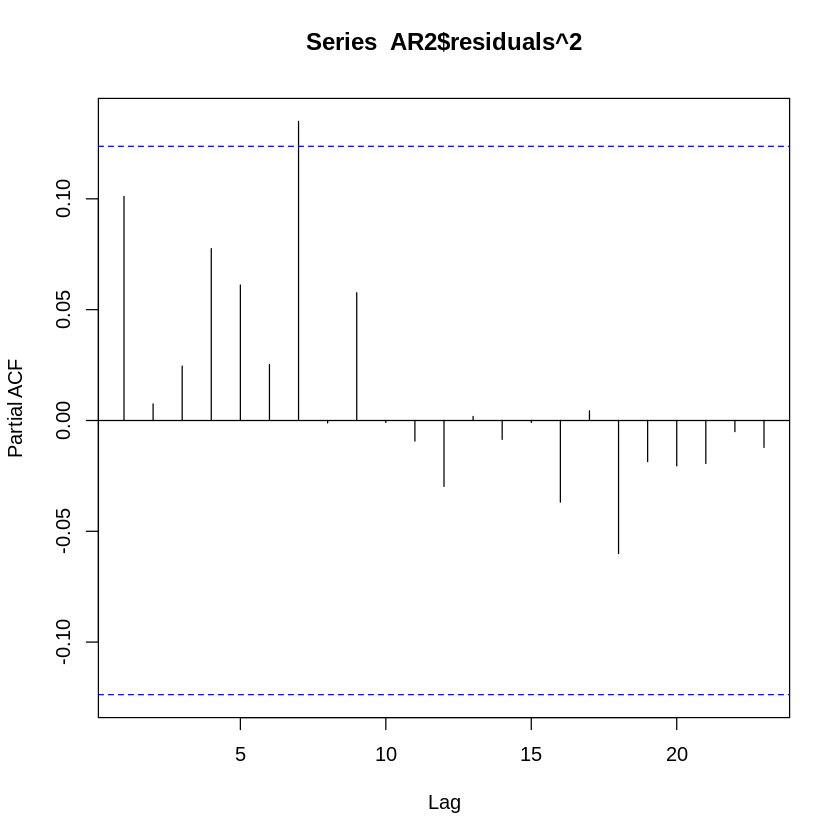

In [ ]:
#afficher l'autocorrélogramme de nos résidus au carré
pacf(AR2$residuals^2)

Nous effectuons un test ARCH pour tester l'hypothèse nulle d'absence d'effet ARCH, c'est à dire l'absence d'hétéroscédasticité conditionnelle des résidus. Au vu du PACF effectué sur nos résidus au carré ci-dessus, nous effectuons le test ARCH avec 8 retards.

In [ ]:
library(FinTS)
ArchTest(AR2$residuals,lags=8,demean = FALSE)


Attaching package: ‘FinTS’


The following object is masked from ‘package:forecast’:

    Acf





	ARCH LM-test; Null hypothesis: no ARCH effects

data:  AR2$residuals
Chi-squared = 9.5425, df = 8, p-value = 0.2986


La statistique de test est égale à **ARCH** = 9,5425

Sous HO, la stat ARCH suit une loi de Chi-deux (8). Pour un risque de première espèce de 5%, le seuil critique est de 15,5073.
**ARCH** = 9,5425 < 15,5073 donc nous ne rejetons pas l'hypothèse nulle d'absence d'effet ARCH pour les résidus, pour un risque de première espèce de 5%. Les résidus sont homoscédastiques, c'est à dire que la variance des résidus est constante.

## 5. Prévisions de notre série

### Calcul des prévisions et représentation graphique

Nous créons un nouveau dataframe contenant uniquement les dates d'observations et une nouvelle série du spread de crédit hypothécaire, dans laquelle nous avons supprimées les trois dernières valeurs de la série originelle, c'est à dire les valeurs correspondant aux trois derniers mois de 2021.

Nous cherchons à faire une prévision sur ces trois mois, puis à comparer avec les vraies valeurs de la série originelle, pour voir si notre modèle réussit à faire de bonnes prévisions.

In [ ]:
df_nouveau <- data.frame(DATES_BIS = Base$Date, MORTGAGE_SPREADS_BIS = MORTGAGE_SPREADS)      #création d'un dataframe avec uniquement la colonne date et la colonne spread de crédit
DataBis <- head(df_nouveau, -3)    #suppression des trois dernières observation
df_databis <- data.frame(DataBis)  #mise en forme de nos nouvelles séries sous forme de data frame


Nous estimons un nouveau modèle AR(2) sur la nouvelle série du spread de crédit afin d'estimer les bons coefficients.

In [ ]:
library(forecast)
AR2bis<-Arima(y = df_databis[,c("MORTGAGE_SPREADS_BIS")] ,order=c(2,0,0))
library(lmtest)
coeftest(AR2)


z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ar1        1.084393   0.061927 17.5108 < 2.2e-16 ***
ar2       -0.189366   0.062166 -3.0461  0.002318 ** 
intercept  1.758504   0.063037 27.8965 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Nous calculons les prévisions pour les 3 derniers mois de l'année 2021, c'est à dire à horizon h=3, ainsi que leurs intervalles de confiance à 95%.

    Point Forecast    Lo 95    Hi 95
249       1.547634 1.334604 1.760665
250       1.572845 1.258752 1.886939
251       1.596848 1.218988 1.974707

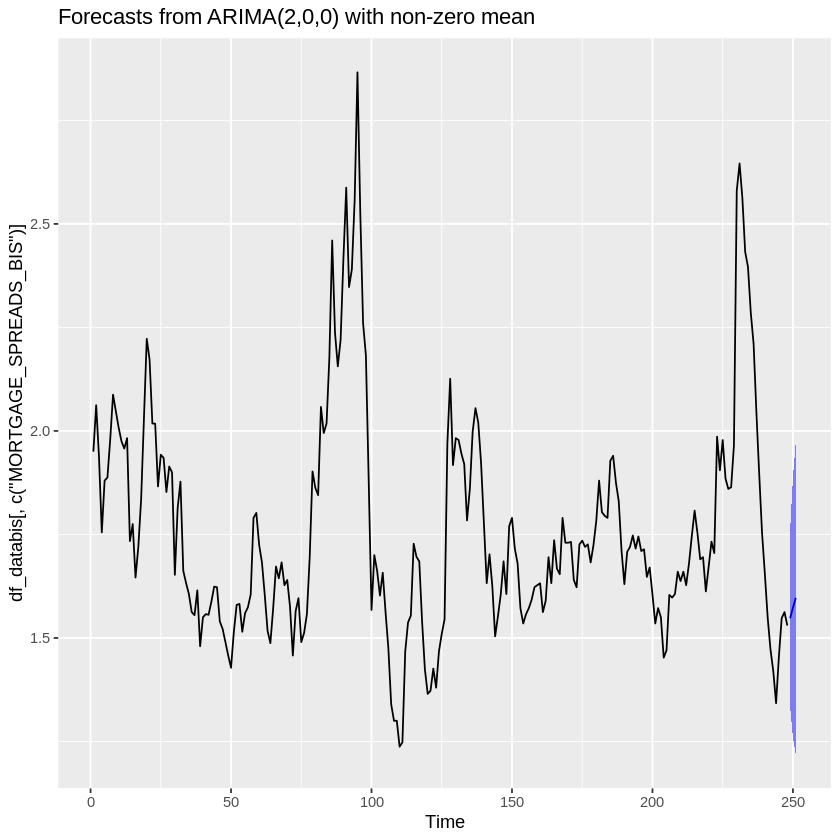

In [ ]:
library(forecast)
forecast_AR2bis<-forecast(AR2bis,h=3,level=95)
forecast_AR2bis
autoplot(forecast_AR2bis)

Nous pouvons maintenant visualiser dans un graphe la prévision de notre modèle et les réelles valeurs observées.

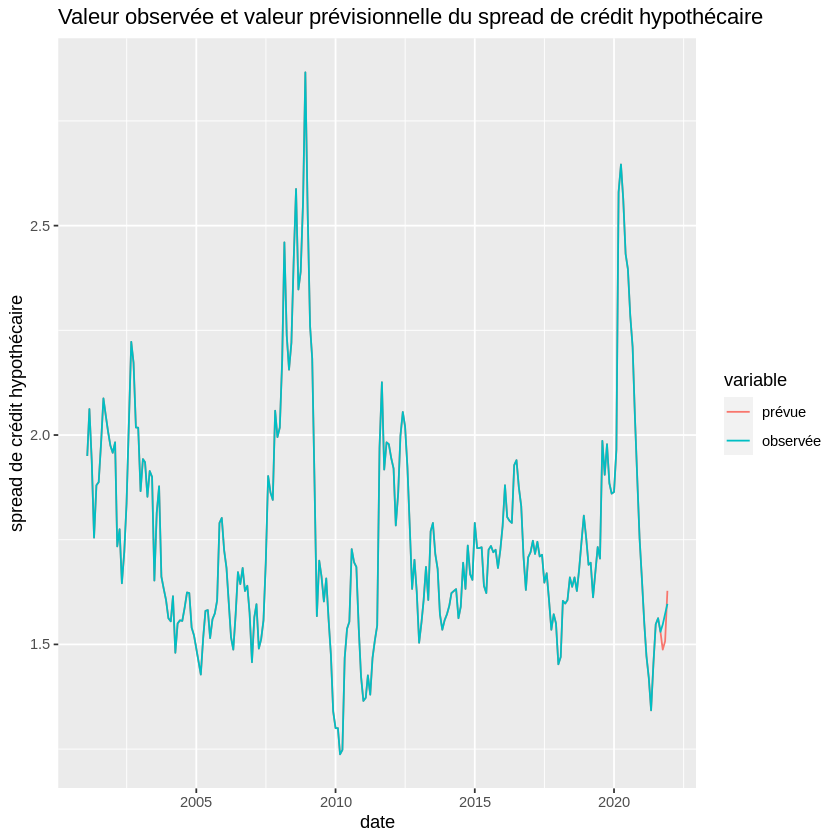

In [ ]:
library(reshape2)
df_final<-cbind.data.frame(Base$Date,Base$MORTGAGE_SPREADS,c(MORTGAGE_SPREADS[1:248],as.matrix(forecast_AR2bis$mean)))

colnames(df_final)<-c("date","prévue","observée")

data_F_melt=melt(as.data.frame(df_final),id.vars = 1)

p_g_us<-ggplot(data=data_F_melt,aes(x=date))+geom_line(aes(x=date,y=value,color= variable))
p_g_us+labs(y="spread de crédit hypothécaire",title = "Valeur observée et valeur prévisionnelle du spread de crédit hypothécaire")

En observant le graphe et en comparant les valeurs prévues (1.54, 1.57, 1.59) et les valeurs observées (1.48, 1.50, 1.62), nous pouvons voir que la prévision est très proche des vraies valeurs. Notre modèle arrive donc à bien anticiper l'évolution de la série, bien que les prévisions sur-estiment légèrement l'amplitude des variations.

####Calcul des prévisions

Nous avons trouvé les prévisions à horizon 3 grâce à notre code. Nous allons ici présenter la démonstration mathématiques afin de comprendre comment sont calculées les prévisions. Tout d'abord, on affiche les 5 dernières valeurs observées.

In [6]:
tail(MORTGAGE_SPREADS[247:251])

[1] 1.5625 1.5300 1.4875 1.5075 1.6280

On estime notre équation, qui se base sur les coefficents obtenus en modélisant notre AR(2).


$$
\left\lbrace
\begin{array}{l}
Mortgage\_spread_{t} = 1,7586+\hat{u}_{t}\\
\hat{u}_{t}=1.0844\times \hat{u}_{t-1}-0.1894\times \hat{u}_{t-2}+\hat{\epsilon}_{t}
\end{array}
\right.
$$

En remplacant on obtient :

$$
\begin{aligned}
Mortgage\_spread_{t} - 1.7586 &= 1.0844\times(Mortgage\_spread_{t-1} - 1.7586)- 0.1894\times (Mortgage\_spread_{t-2} - 1.7586)+\hat{\epsilon}_{t}\\
 Mortgage\_spread_{t} &  = (1 - 1.0844 + 0.1894)\times 1.7586+ 1.0844\times Mortgage\_spread_{t-1}-0.1894\times Mortgage\_spread_{t-2} +\hat{\epsilon}_{t}\\
Mortgage\_spread_{t} &= 0.18465+ 1.0844\times Mortgage\_spread_{t-1}-0.1894\times Mortgage\_spread_{t-2} +\hat{\epsilon}_{t}
\end{aligned}
$$

On peut maintenant faire nos calculs de prévision :

- Calcul de la prévision pour Octobre 2021 (h=1)

$$
\begin{aligned}
Mortgage\_spread_{2021:Oct}^{a} &= 0.18465+ 1.0844\times Mortgage\_spread_{2021:Sept}-0.1894\times Mortgage\_spread_{2021:Aout}\\
\Rightarrow Mortgage\_spread_{2021:Oct}^{a}&= 0.18465+ 1.0844\times 1.53- 0.1894\times 1.5625 = 1.547
\end{aligned}
$$

- Calcul de la prévision pour Novembre 2021 (h=2)

$$
\begin{aligned}
Mortgage\_spread_{2021:Nov}^{a} &= 0.18465+ 1.0844\times Mortgage\_spread_{2021:Oct}-0.1894\times Mortgage\_spread_{2021:Sept}\\
\Rightarrow Mortgage\_spread_{2021:Nov}^{a}&= 0.18465+ 1.0844\times 1.547- 0.1894\times 1.53 = 1.572
\end{aligned}
$$

- Calcul de la prévision pour Décembre 2021 (h=3)

$$
\begin{aligned}
Mortgage\_spread_{2021:Dec}^{a} &= 0.18465+ 1.0844\times Mortgage\_spread_{2021:Nov}-0.1894\times Mortgage\_spread_{2021:Oct}\\
\Rightarrow Mortgage\_spread_{2021:Dec}^{a}&= 0.18465+ 1.0844\times 1.572- 0.1894\times 1.547 = 1.596
\end{aligned}
$$

# II. MODELISATION MULTIVARIÉE

---

### Désaisonnalisation de la série des catastrophes naturelles

Nous voulons traiter la saisonnalité dans notre série des catastrophes naturelles  car elle pose problème pour stationnariser et estimer notre série.

Warning message in log(serie_desaisonnalisee):
“NaNs produced”
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


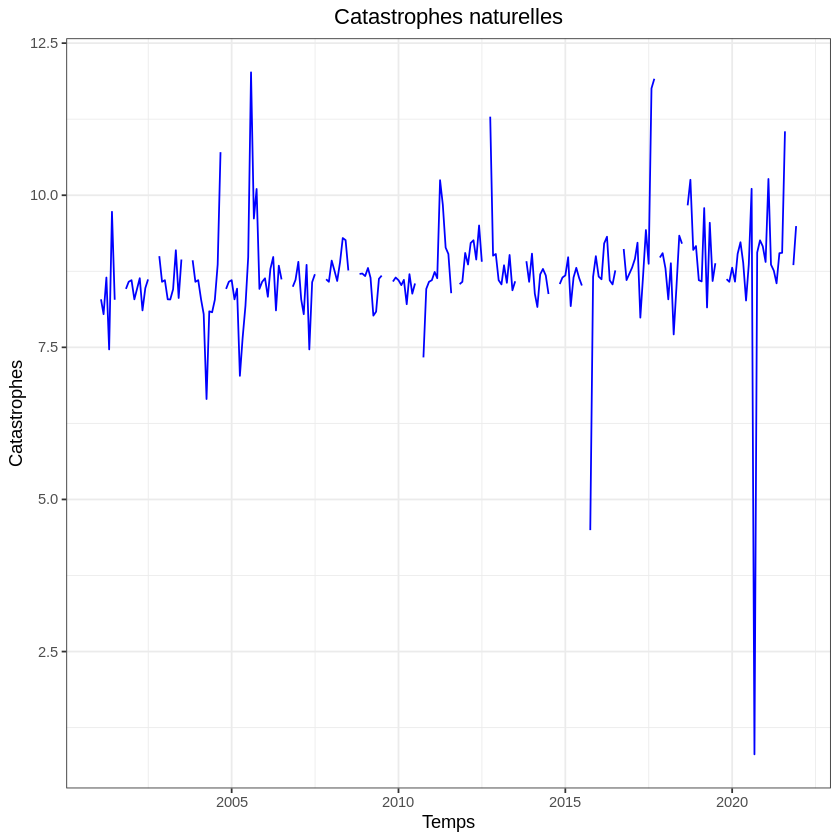

In [ ]:
library(forecast)

serie_temp <- ts(NAT_DISASTERS, frequency = 12)
decomposition <- decompose(serie_temp)

tendance <- decomposition$trend
saisonnalite <- decomposition$seasonal
residus <- decomposition$random

serie_desaisonnalisee <- serie_temp - saisonnalite

library(ggplot2)
Base$logII <- log(serie_desaisonnalisee) #passage en log de la série
p1<-ggplot(data=Base,aes(x=DATE,y=logII))+geom_line(colour='blue')+ggtitle('Catastrophes naturelles')+xlab('Temps')+ylab('Catastrophes')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
p1


La série affiche beaucoup moins de variance qu'auparavant, nous allons maintenant tester la stationnarité avec un test de KPSS.

In [ ]:
kpss_mu <- ur.kpss(y = Base$logII, type = "mu", lags = "short")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.3083 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La statistique du test KPSS (**t KPSS**) est égale à 0,308. Le seuil de rejet pour une valeur critique de 5% est 0,463.

**t KPSS** = 0,308 < 0,463 donc nous ne pouvons pas rejeter l'hypothèse nulle de stationnarité de notre série, pour un risque de première espèce de 5%.

Notre série est donc stationnaire.

### Sélection du nombre de retards optimal

Nous importons d'abord nos données désaisonnalisées et la série du spread de crédit dans un nouveau dataframe. Nous choisissons un nombre de retards maximum égal à 12 (correspond à 1 an de recul pour des données mensuelles) et nous estimons un modèle VAR sans constante ni tendance.

In [ ]:
install.packages("vars")
library(vars)

df <- data.frame(NAT_D = Base$logII, MORTGAGE_SPREADS = MORTGAGE_SPREADS)
df <- na.omit(df)    #nous supprimons les valeurs erreurs

pselect <- VARselect(y = df, lag.max = 12, type = c("none"))
pselect$criteria #affiche les valeurs des critères de sélection pour chaque retard
pselect$selection #nous donne le nombre de retards optimal pour chaque critère de sélection


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘strucchange’, ‘sandwich’


Loading required package: MASS

Loading required package: strucchange

Loading required package: sandwich



,1,2,3,4,5,6,7,8,9,10,11,12
AIC(n),-3.93963439,-4.12732230,-4.15025247,-4.16055245,-4.13484429,-4.13024010,-4.17468464,-4.19823865,-4.17808626,-4.16534241,-4.14197142,-4.12465369
HQ(n),-3.91245083,-4.07295517,-4.06870177,-4.05181820,-3.99892647,-3.96713871,-3.98439969,-3.98077013,-3.93343418,-3.89350677,-3.84295222,-3.79845092
SC(n),-3.87249594,-3.99304539,-3.94883711,-3.89199864,-3.79915203,-3.72740938,-3.70471547,-3.66113103,-3.57384018,-3.49395788,-3.40344845,-3.31899226
FPE(n),0.01945535,0.01612619,0.01576105,0.01560038,0.01600804,0.01608403,0.01538766,0.01503313,0.01534398,0.01554689,0.01592218,0.01620971


AIC(n)  HQ(n)  SC(n) FPE(n) 
     8      2      2      8

Nous cherchons le nombre de retards optimal pour notre VAR, c'est à dire le nombre de retards pour lequel les critères d'informations sont minimisés.

Les critères AIC, HQ et SC préconisent respectivement 8, 2 et 2 retards. De plus, le nombre de retards optimal est inférieur à notre lag.max.

Or nous savons que le critere AIC a tendance à surestimer le nombre de retards. Nous allons donc estimer un modèle VAR avec 2 retards en accord avec les critères HQ et SC.

### Estimation d'un modèle VAR(2)

Nous estimons un modèle VAR(2).

In [ ]:
var.2lag <-VAR(y = df,type="none",lag.max = 2)
summary(var.2lag)


VAR Estimation Results:
Endogenous variables: NAT_D, MORTGAGE_SPREADS 
Deterministic variables: none 
Sample size: 205 
Log Likelihood: -147.562 
Roots of the characteristic polynomial:
0.9982 0.7293 0.4673 0.2427
Call:
VAR(y = df, type = "none", lag.max = 2)


Estimation results for equation NAT_D: 
NAT_D = NAT_D.l1 + MORTGAGE_SPREADS.l1 + NAT_D.l2 + MORTGAGE_SPREADS.l2 

                    Estimate Std. Error t value Pr(>|t|)    
NAT_D.l1             0.42113    0.06430   6.550 4.73e-10 ***
MORTGAGE_SPREADS.l1  0.30202    0.63494   0.476    0.635    
NAT_D.l2             0.41396    0.06474   6.395 1.11e-09 ***
MORTGAGE_SPREADS.l2  0.50898    0.63021   0.808    0.420    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 1.063 on 201 degrees of freedom
Multiple R-Squared: 0.9857,	Adjusted R-squared: 0.9854 
F-statistic:  3454 on 4 and 201 DF,  p-value: < 2.2e-16 


Estimation results for equation MORTGAGE_SPREADS: 
MORTGAGE_SPREADS = NAT_D.l

NAT_D.li et MORTGAGE_SPREADS.li représentent respectivement
NAT_D et MORTGAGE_SPREADS avec un retard de i périodes.

Le seul critique pour un risque de première espèce de 1% est 2,57.

Nous avons deux équations.
La première équation cherche à expliquer les pertes dûes aux catastrophes naturelles par les pertes dûes aux catastrophes naturelles passées et le spread de crédit passé (avec deux valeurs passées).

La deuxième équation cherche à expliquer le spread de crédit par le spread de crédit passé et les catastrophes naturelles passées (avec deux valeurs passées).

***1ere équation des catastrophes naturelles "NAT_D" :***
- le coefficient de NAT_D.l1 est positif et significatif (6,55 > 2,57) pour un risque de première espèce de 1%. Cela signifie que nous observons une alternance d'accéleration et de ralentissement de la fréquence pertes dûes aux catastrophes naturelles.
- le coefficient de MORTGAGE_SPREADS.l1 est positif mais non significatif (0,476 < 2,57) pour un risque de première espèce de 1%.
- le coefficient de NAT_D.l2 est positif et significatif (6,395 > 2,57) pour un risque de première espèce de 1%.
- le coefficient de MORTGAGE_SPREADS.l2 est positif mais non significatif (0,808 < 2,57) pour un risque de première espèce de 1%.
- Le R2 est égal à 99%.

Nous voyons que les coefficients des valeurs passées du spread de crédit ne sont pas significatifs dans l'explication de la valeur présente des pertes dûes aux catastrophes naturelles. C'est logique, car un spread de crédit n'a aucun impact sur les pertes dûes aux catastrophes naturelles. Une catastrophe naturelle est par définition un évènement exogène, et peut être potentiellement influencé par des catastrophes passées (un ouragan provoquera des inondations, une sécheresse provoquera des feux de forêts etc), donc les pertes provoquées par une catastrophe naturelle peuvent dépendre de catastrophes passées mais pas d'un spread de crédit décidé par une banque.


***2e équation du spread de crédit hypothécaire "MORTGAGE_SPREADS" :***

- le coefficient de NAT_D.l1 est positif et non significatif (1,757 < 2,57) pour un risque de première espèce de 1%.
- le coefficient de MORTGAGE_SPREADS.l1 est positif et significatif (15,705 > 2,57) pour un risque de première espèce 1%.
- le coefficient de NAT_D.l2 est positif et non significatif (1,256, < 2,57) pour un risque de première espèce de 1%.
- le coefficient de MORTGAGE_SPREADS.l2 est négatif et significatif (2,75 > 2,57) pour un risque de première espèce de 1%.
- Le R2 est égal à 99%.

On voit que les valeurs passées du spread de crédit sont singificiatives dans l'explication de la valeut présente du spread, ce qui semble assez logique car un spread de crédit ne peut pas être complètement décorrélé de ses valeurs passées. Cependant, la série des pertes dûes aux catastrophe naturelle n'est pas significative donc le spread de crédit actuel n'est pas expliqué par cette variable. Ce résultat va à l'encontre de notre hypothèse de base mais nous décidons de continuer la modélisation malgré tout.

####Affichage des racines du polynôme caractéristique

Nous étudions la stationnarité du VAR. La fonction roots renvoie les modules des inverses des racines du polynôme caractéristique.

In [ ]:
roots(var.2lag)

[1] 0.9982373 0.7292798 0.4673309 0.2426791

Les inverses des racines du polynome sont de module strictement inférieur à 1 : la condition de stationnarité est donc satisfaite.

####Test de causalité au sens de Granger

Nous vérifions si la série des catastrophes naturelles explique la série du spread de crédit. Nous effectuons pour cela un test de causalité à la Granger.
Nous testons l'hypothèse nulle d'absence de causalité contre l'hypothèse alternative de causalité entre les variables.

In [ ]:
causality(var.2lag,cause=c('NAT_D'))

$Granger

	Granger causality H0: NAT_D do not Granger-cause MORTGAGE_SPREADS

data:  VAR object var.2lag
F-Test = 7.9507, df1 = 2, df2 = 402, p-value = 0.0004108


$Instant

	H0: No instantaneous causality between: NAT_D and MORTGAGE_SPREADS

data:  VAR object var.2lag
Chi-squared = 0.01117, df = 1, p-value = 0.9158



La p-value du test est égale à 0.0004108, ce qui est très bas.
Si nous utilisons un niveau de signification de 5%, la p-value est largement inferieure à ce seuil. Nous disposons donc de suffisamment de preuves pour rejeter l'hypothèse nulle. Il y a bien causalité à la Granger des pertes dûes aux catastrophes naturelles vers le spread de crédit.


Nous vérifions maintenant l'impact du spread de crédit sur la série des catastrophes naturelles.

In [ ]:
causality(var.2lag,cause=c('MORTGAGE_SPREADS'))

$Granger

	Granger causality H0: MORTGAGE_SPREADS do not Granger-cause NAT_D

data:  VAR object var.2lag
F-Test = 5.6049, df1 = 2, df2 = 402, p-value = 0.003973


$Instant

	H0: No instantaneous causality between: MORTGAGE_SPREADS and NAT_D

data:  VAR object var.2lag
Chi-squared = 0.01117, df = 1, p-value = 0.9158



La p-value du test est égale à 0,003. Pour un niveau de signification de 0.05, la p-valeur est inférieure au seuil, nous pouvons donc rejeter l'hypothèse nulle. Cela signifie qu'il y a une causalité à la Granger du spread de crédit vers les catastrophes naturelles.

Cependant, il est important de noter qu'économiquement parlant, cette hypothèse
semble peu probable. Un spread de crédit ne peut pas impacter des pertes dûes aux catastrophes naturelles, qui, comme noté auparavant, sont des chocs exogènes.

Pour conclure, d'après le test de Granger, les catastrophes naturelles ont bien un impact sur le spread de crédit; et le spread de crédit a un impact sur les catastrophes naturelles (meme si cette dernière affirmation a peu de sens économiquement). Ainsi puisque la causalité s'exerce dans les deux sens, nous avons un effet feedback sur nos séries temporelles.

###Analyse impulsion-réponse des chocs

#### La méthode des VAR

Ainsi par notre test de granger nous avons conclut que nos séries temporelles s'influencent l'une et l'autre. C'est ce qu'on appelle l'effet feedback. De ce fait, les test de causalité au sens de Granger ne nous permettent pas de dégager un "classement" de nos variables.

Cependant et comme nous l'avons mentionné précédemment, le fait que le spread de crédit influence les pertes dûes aux catastrophes naturelles a peu de sens économiquement. Ainsi nous pouvons penser que la réelle causalité réside dans l'effet inverse : les catastrophes naturelles (ou du moins les pertes liées à ces catastrophes) influencent le spread de crédit.

Nous décidons donc de "placer" la série des catastrophes naturelles en première position et la série du spread de crédit en seconde position.

In [ ]:
var.2lag <-VAR(y = df[,c("NAT_D","MORTGAGE_SPREADS")],type="none",lag.max = 2)


Nous calculons les fonctions d'impulsion-réponse.

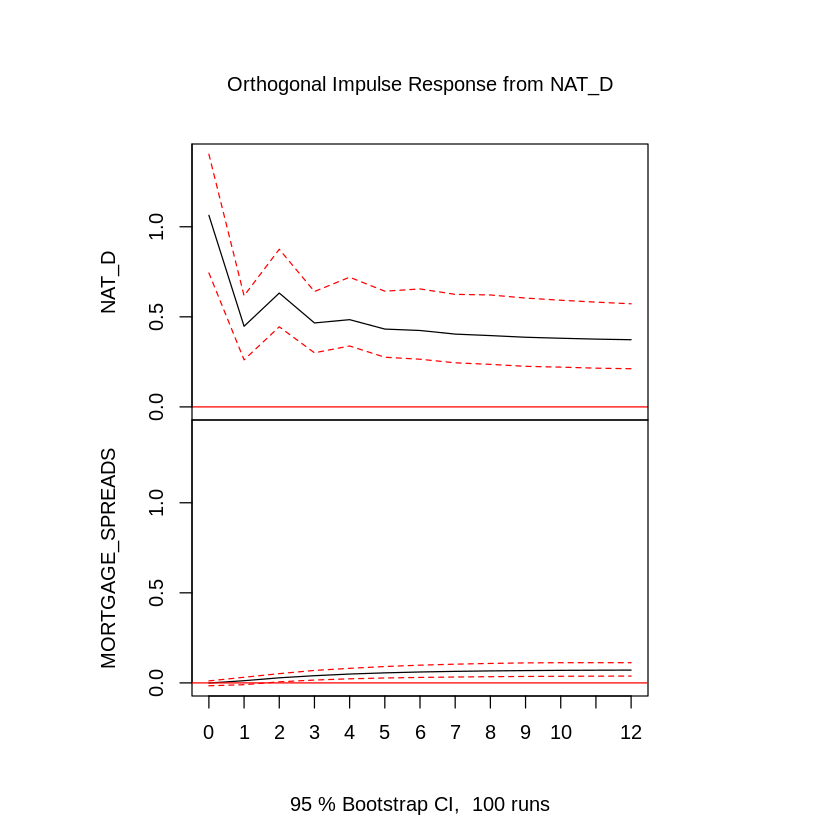

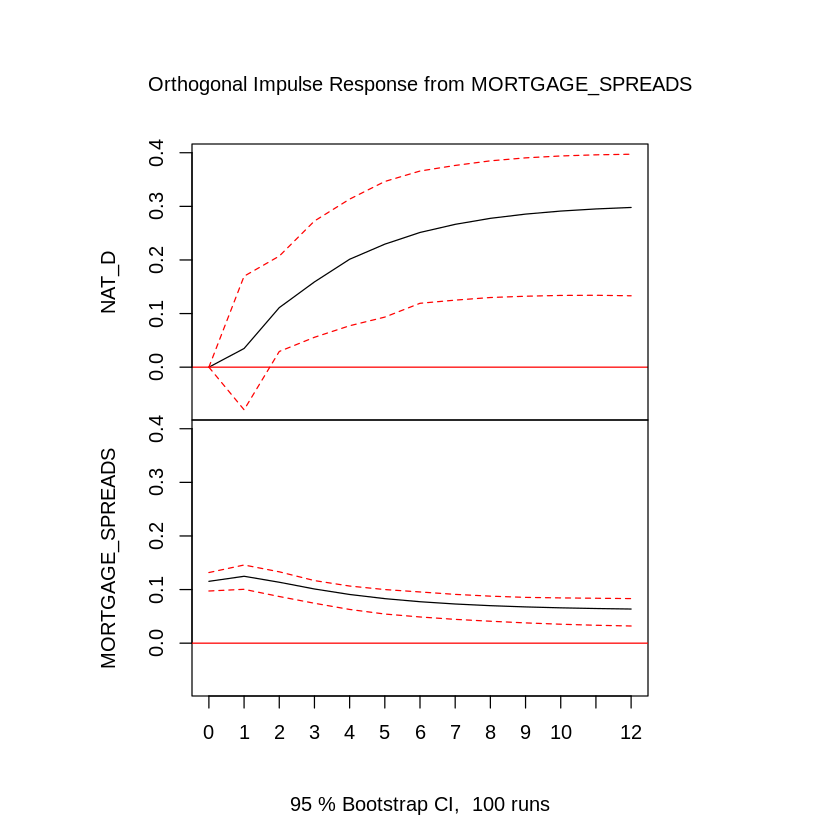

In [ ]:
irf<-irf(var.2lag,n.ahead = 12,ortho = TRUE,ci=0.95)          #n.ahead fixe le nombre de périodes futures pour lesquelles on calcule les impulsions réponses
plot(irf)                                                   #ortho = TRUE : on applique la décomposition de Cholesky.

- Effet d'un choc sur NAT_D : un choc sur les catastrophes naturelles n'a pas d'effet instantané sur le spread de crédit. Cependant, à partir de t=1 ce choc est légerement positif et définitif, c'est a dire qu'il ne se resorbe pas avec le temmps. Comme on peut le voir à t=12.
Cette conclusion fait sens, car une hausse des pertes économiques dues aux catastrophes naturelles rendent les ménages plus susceptibles de faire défaut. L'octroi de crédit devient donc plus riqué pour les banques, ce qui entraine mécaniquement une hausse des taux d'interet et donc une hausse du spread de crédit : l'écart entre le taux sans risque et le taux accordé aux ménages est de plus en plus grand. Cet effet est durable sur au moins 1 an, en effet une telle perte financière pour les ménages ne peut pas se resorber en quelques mois. Enfin le fait que l'impact ne commence qu'a partir de h=1 s'explique par le temps de réaction des institutions financieres.

- Effet d'un choc sur le spread de crédit : un choc sur le spread de crédit n'a pas d'impact instantané sur les catastrophes naturelles. Cependant un impact positif à partir de h=1. Cet impact est defnitif et croissant. Encore une fois cette conclusion a peu de sens.


Cependant, la courbe des chocs ne sort jamais de l'intervalle de confiance. Le choc n'est donc jamais significatif. Cela signifie que notre modèle VAR ne permet pas de modéliser de façon significative la causalité entre nos deux séries.

#### Méthode des projections locales

On estime les fonctions d'impulsion réponse par la méthode des projections locales. Le nombre d'horizon est égal à 12, et pour chaque horizon h=1,...,12, le nombre de retards dans la régression de la projection locale sera au plus égal à 12.

In [ ]:
install.packages("lpirfs")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miscTools’, ‘rbibutils’, ‘iterators’, ‘bdsmatrix’, ‘collapse’, ‘maxLik’, ‘Rdpack’, ‘Formula’, ‘doParallel’, ‘foreach’, ‘gridExtra’, ‘plm’




[[1]]
NULL


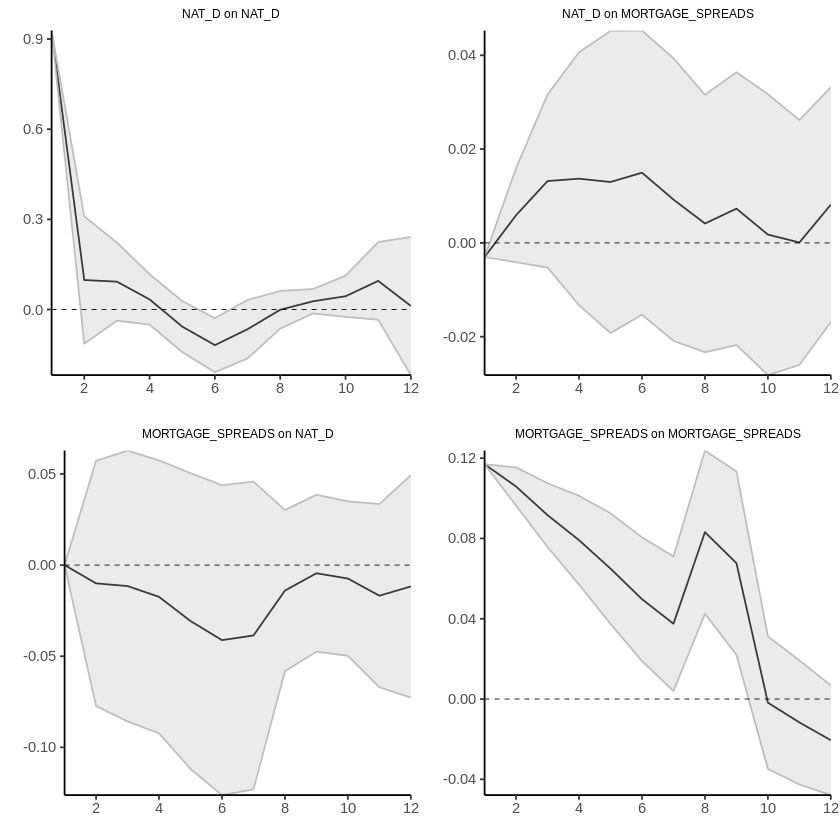

In [ ]:
library(lpirfs)
irf_LP <-lp_lin(endog_data = df,
                    lags_endog_lin = NaN,
                    lags_criterion = 'BIC',
                    max_lags = 8,
                    trend = 0,
                    shock_type = 0,
                    confint=1.96,
                    hor=12,
                    adjust_se=TRUE)

plot(irf_LP)

- **Effet d'un choc sur la série des catastrophes naturelles**
On obtient aproximativement les mêmes résultats que dans le test d'impulsion réponse précédent. La seule différence est que l'effet s'estompe à h=11 avant de reprendre légerement. Cependant on note que la courbe se trouve à l'intérieur de l'intervalle de confiance. De ce fait le test n'est pas significatif.

- **Effet d'un choc sur le spread de credit**
L'effet est toujours non immédiat mais cette fois ci négatif. Mais comme auparavant, le test est à l'interieur de l'intervalle de confiance.

Ainsi nous voyons que bien que la methode des projections locales se rapproche de nos fonctions impulsion-réponse, mais les resultats ne sont pas significatifs. Cela signifie que notre modèle VAR ne permet pas de modéliser de façon significative la causalité entre nos deux séries.

### Test de cointégration de Johansen

Nous n'effectuons pas de test de cointégration de Johansen car notre série est stationnaire depuis le départ (c'est à dire intégré d'ordre 0).

# Conclusion

Ainsi, nous avons examiné deux séries temporelles : les pertes liées aux catastrophes naturelles et le spread de crédit hypothécaire.

Nous avons constaté que nos deux séries sont stationnaires; et que la série des catastrophes naturelles présentait une saisonnalité, que nous avons corrigée.

De plus, nous avons observé que notre série sur les spreads hypothécaires pouvait être modélisée par un AR(2). Selon nos tests, ce modèle parvenait à anticiper relativement bien l'évolution de la série, bien que l'amplitude des mouvements de la série soient légèrement surestimés par notre modèle.

Par la suite, nous avons cherché à expliquer la relation entre nos deux séries en utilisant un modèle VAR.

Nous avons conclu qu'un modèle VAR(2) était le plus approprié. L'analyse du test de Granger a révélé l'existence d'une causalité entre les catastrophes naturelles et les spreads de crédit. Cependant, le test d'impulsion-réponse et celui des projections locales ont montré que les courbes se situaient à l'intérieur de l'intervalle de confiance. Par conséquent, bien que nous ayons identifié une causalité, elle n'est pas statistiquement significative. Ainsi, la méthode VAR ne semble pas adaptée à notre modèle.